In [32]:
from IPython.display import SVG
from sklearn.datasets import load_digits
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential, Model
from keras.layers import Input, Dense, concatenate, Activation

### Load dataset
- digits dataset in scikit-learn
- url: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [6]:
data = load_digits()

In [9]:
X_data = data.images
y_data = data.target

In [10]:
# flatten X_data
X_data = X_data.reshape(X_data.shape[0], X_data.shape[1]*X_data.shape[2])

In [12]:
# shape of data
print(X_data.shape)
print(y_data.shape)    

(1797, 64)
(1797,)


## Sequential Model API
- Simplest way to create a deep learning model in Keras is utilizing Sequential Model API
- Sequential Model API only enables connecting layers sequentially, hence it is **"a linear stack of layers"**
    - Hence, it is effective to use when creating a "simple" model with a single output such as MLPs
- doc: https://keras.io/getting-started/sequential-model-guide/

<br>
<img src="https://www.researchgate.net/profile/Abdelazim_Negm/publication/273768094/figure/fig2/AS:294800436809735@1447297309947/Figure-4-A-hypothetical-example-of-Multilayer-Perceptron-Network.png" style="width: 400px"/>

### Method 1
- Passing a list of layers into Sequential()
- Efficient to use when the model is small (i.e., shallow)

In [13]:
model = Sequential([Dense(10, input_shape = X_data.shape[1:]), Dense(10, activation = 'softmax')])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________


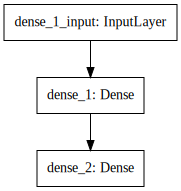

In [15]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Method 2
- Sometimes, if the model gets deeper, it is difficult to get lost with list of layers
- In this case, one can add layers line-by-line with **add()** function
- By doing so, one can also keep track of output shape of the model step-by-step

In [20]:
model = Sequential()

In [21]:
model.add(Dense(10, input_shape = X_data.shape[1:], activation = 'relu'))
print(model.output_shape)

(None, 10)


In [22]:
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
print(model.output_shape)

(None, 50)


In [23]:
model.add(Dense(10, activation = 'sigmoid'))
print(model.output_shape)

(None, 10)


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_8 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
Total params: 4,260
Trainable params: 4,260
Non-trainable params: 0
_________________________________________________________________


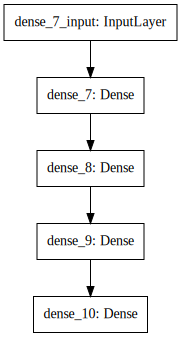

In [25]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### Note
- One can keep track of layer by setting their 'names'

In [28]:
model = Sequential()
model.add(Dense(10, input_shape = X_data.shape[1:], activation = 'relu', name = 'Input_layer'))
model.add(Dense(50, activation = 'relu', name = 'First_hidden_layer'))
model.add(Dense(10, activation = 'softmax', name = 'Output_layer'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Dense)          (None, 10)                650       
_________________________________________________________________
First_hidden_layer (Dense)   (None, 50)                550       
_________________________________________________________________
Output_layer (Dense)         (None, 10)                510       
Total params: 1,710
Trainable params: 1,710
Non-trainable params: 0
_________________________________________________________________


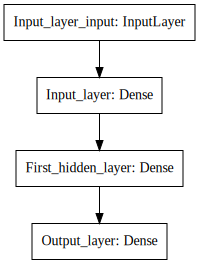

In [29]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))